### 2018/2019 - Task List 3

1. Create simple pyro model, that models any real life situation. Use Pyro [docs](http://pyro.ai/examples/intro_part_i.html). 

 Requirements:

 - not weather (not same as in docs)
 - two distributions
 - one of distribution can result in more than 2 results (not Bernoulli)
   
   
2. Acquire two appropriate datasets from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/)  and provide an exploratory analysis of its content:

 Dataset requirements:
 
 - at least five numerical attributes attributes
 - at least 1000 instances

 Tasks:
    
 - scatter plot of EACH attribute pair (matrix of plots), on diagonal we want to see histogram of given attribute ([tutorial](https://seaborn.pydata.org/tutorial/distributions.html), [docs](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) , [docs](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot))
 - scatter plot of each attribute pair with histograms on axes (write a function that generates plot for given attributes pair) ([link](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot))
 - correlation (for EACH attribute pair, if appropriate)
 - covariances (for EACH attribute pair, if appropriate)

 Elaborate on results.

## Required imports

In [1]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# Speeding up sampling

In [2]:
%%timeit -n 10

for _ in range(1000):
    pyro.sample('variable', pyro.distributions.Bernoulli(0.3))

96.5 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Use vectorization (sample many at once, look at docs)

In [3]:
%%timeit -n 10
count = 1000
with pyro.plate("name", 1000) as _:
        data = pyro.sample('variable', pyro.distributions.Bernoulli(0.3))
        assert(len(data)==1000)

869 µs ± 166 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Task 1

In [4]:
def mood():
    m = torch.distributions.Categorical(torch.tensor([ 0.3, 0.3, 0.4])).sample()
    m = 'great' if m.item() == 0.0 else ('good' if m.item() == 1 else 'bad')
    mean_points = {'great': 9.0, 'good': 7.0, 'bad': 4.0}[m]
    scale_points = {'great': 1.0, 'good': 1.5, 'bad': 2.0}[m]
    points = torch.distributions.Normal(mean_points, scale_points).rsample()
    return m, points.item()

print(mood())

('bad', 4.28265380859375)


# Task 2.1

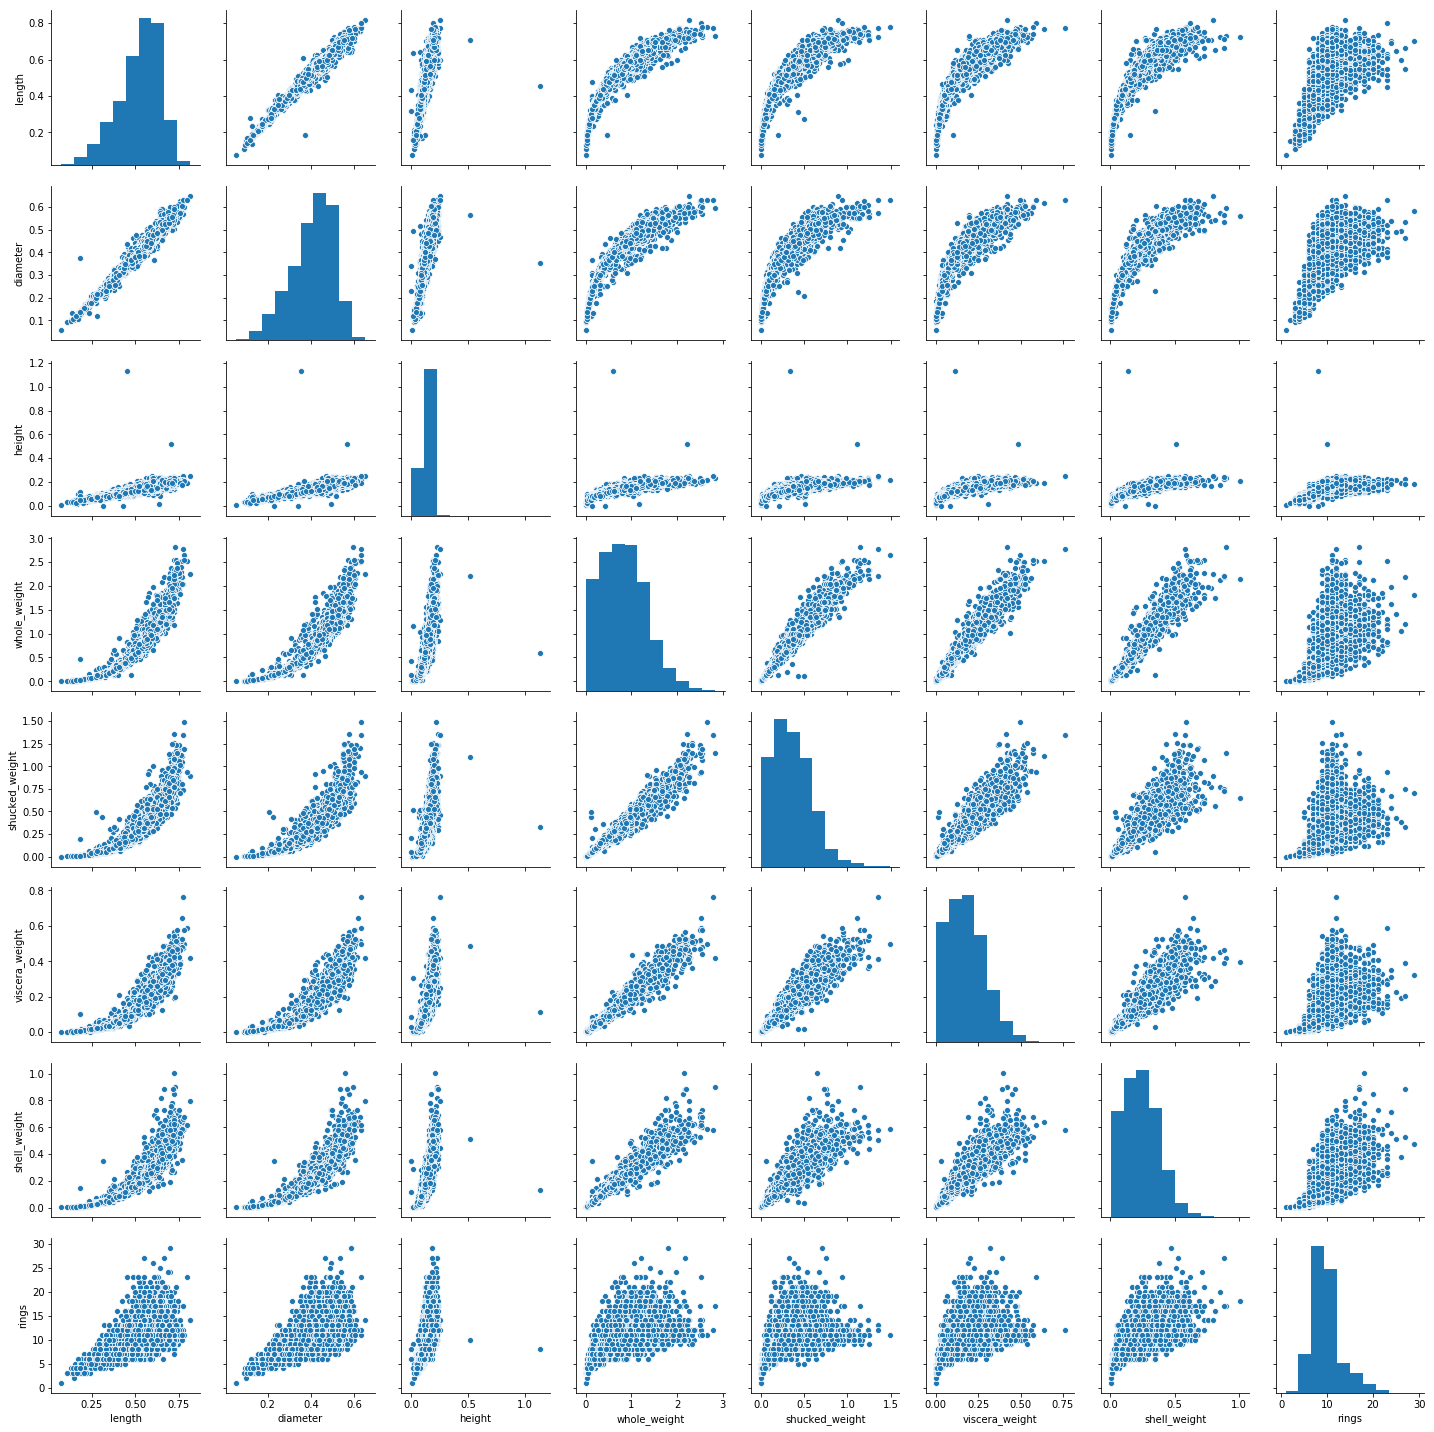

In [5]:
import csv
import pandas as pd
import seaborn as sns

abaloneData = pd.read_table('abalone_data.csv', sep=',')
sns.pairplot(abaloneData)

# Task 2.2

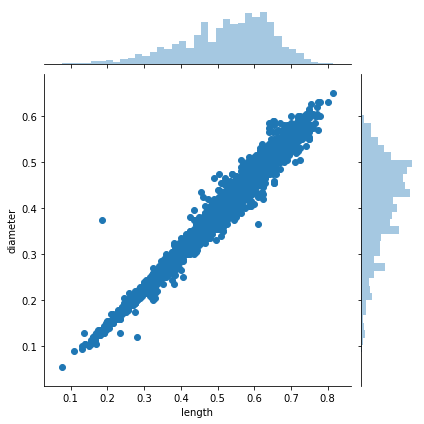

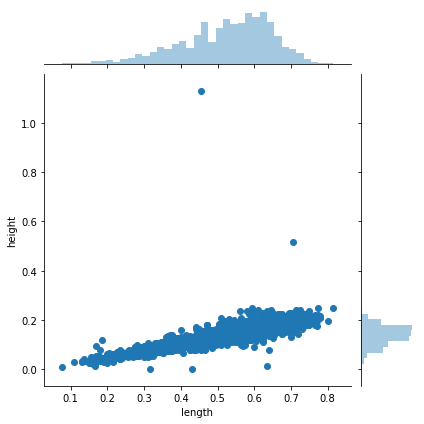

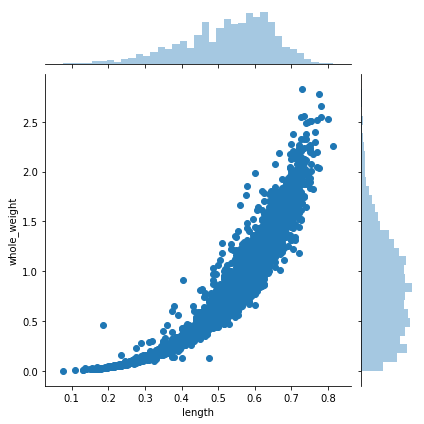

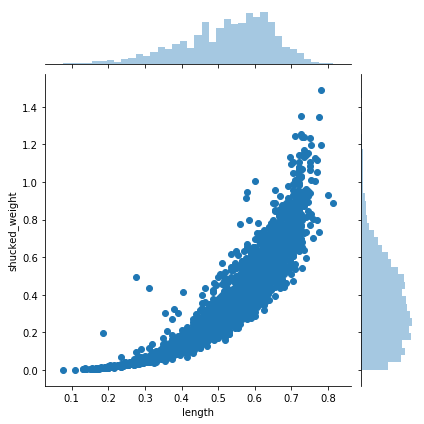

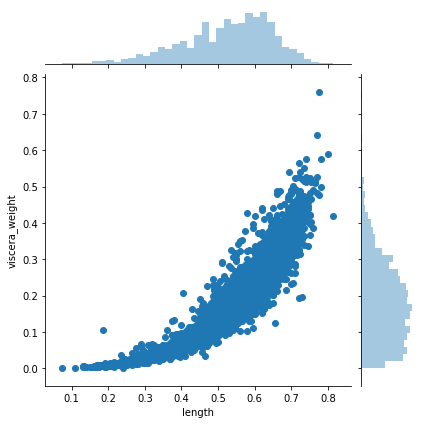

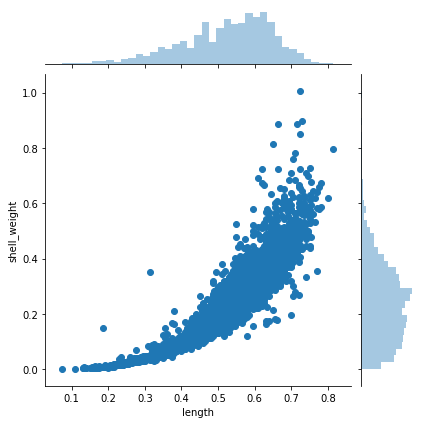

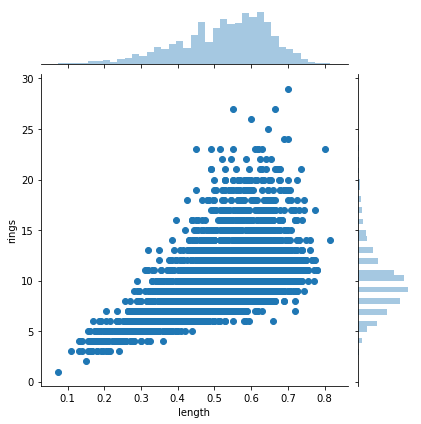

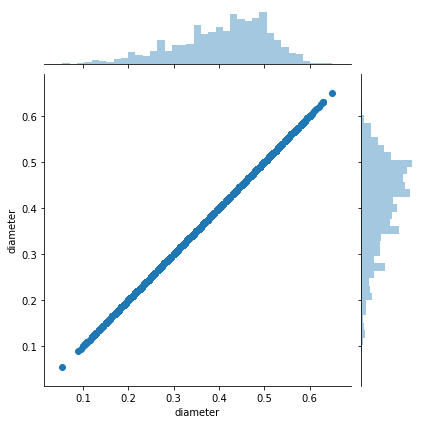

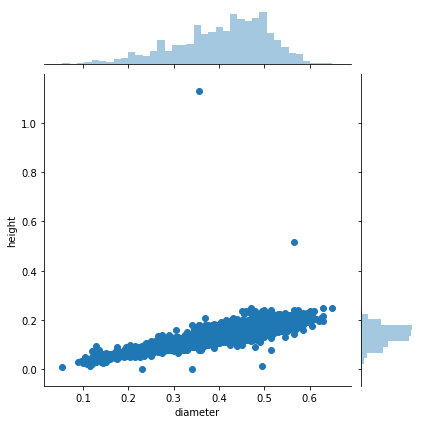

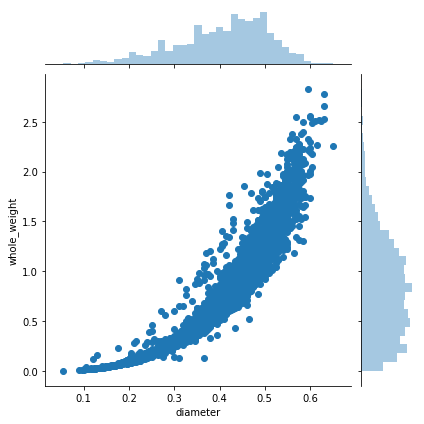

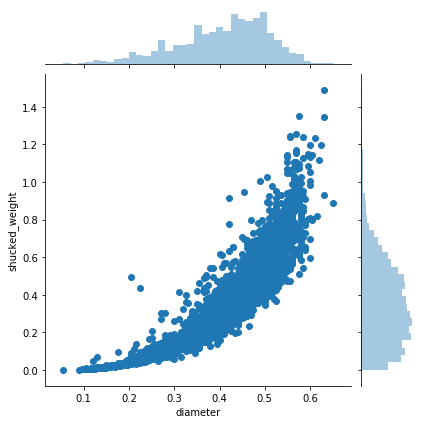

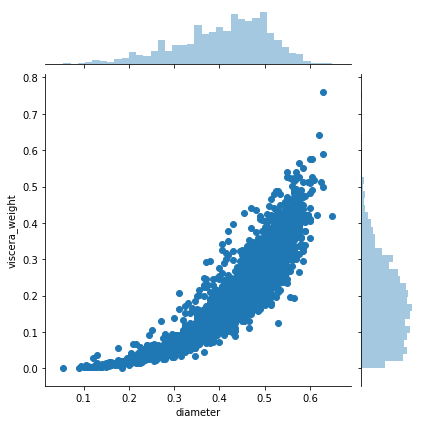

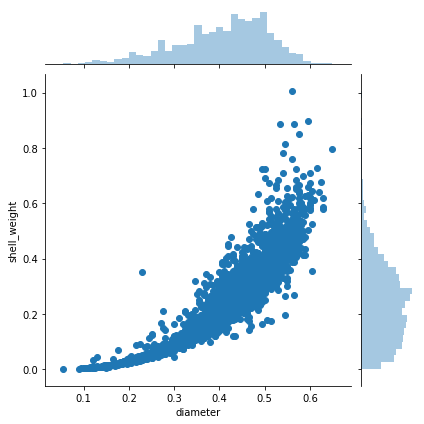

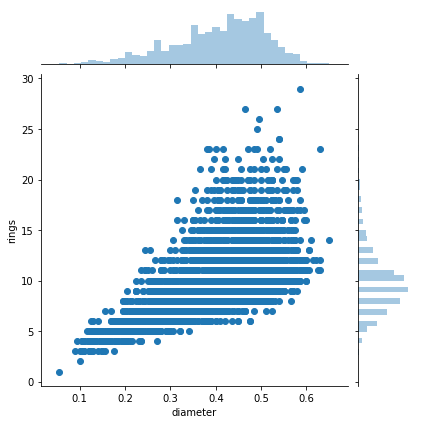

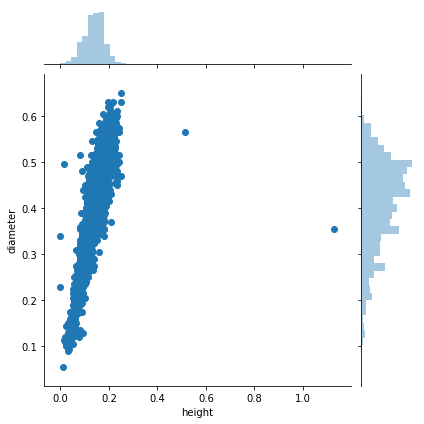

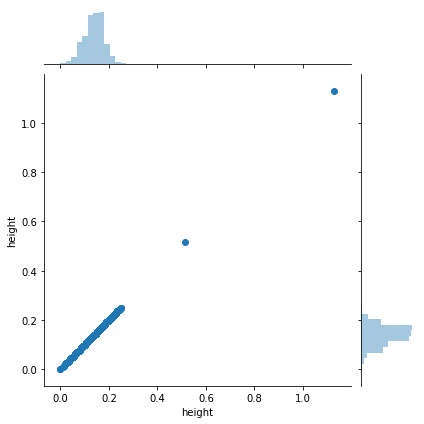

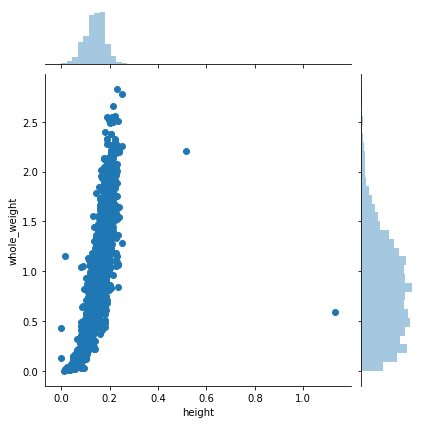

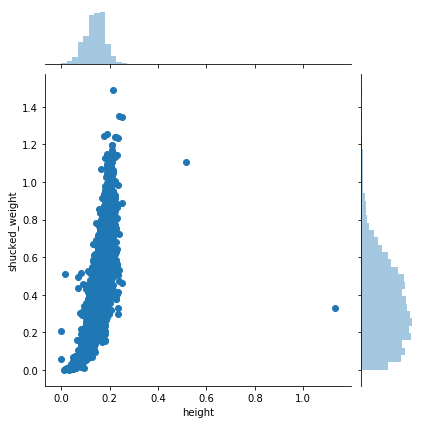

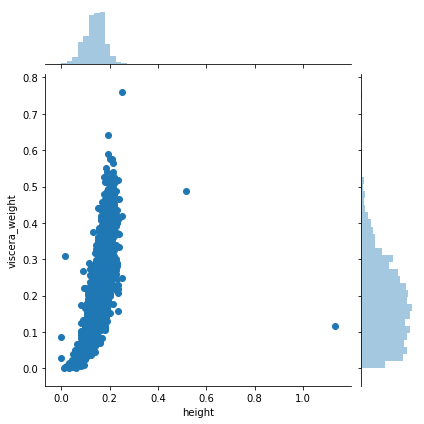

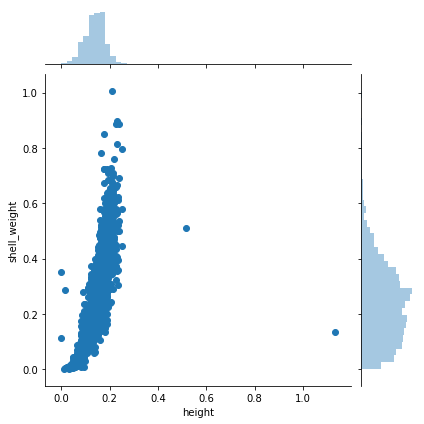

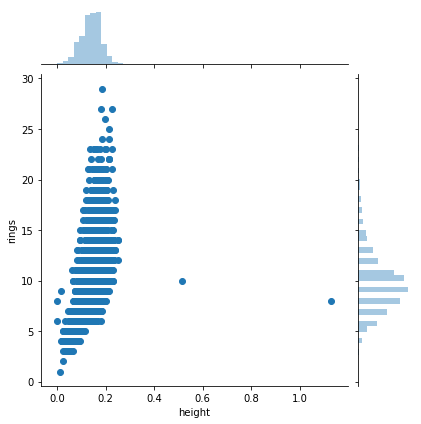

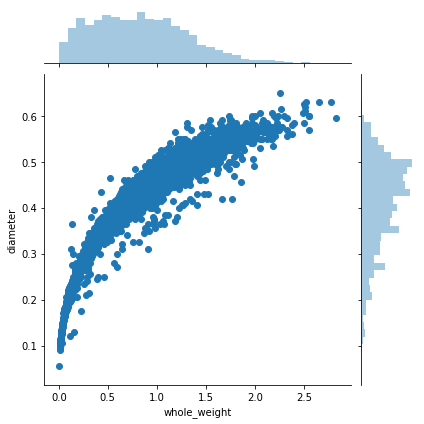

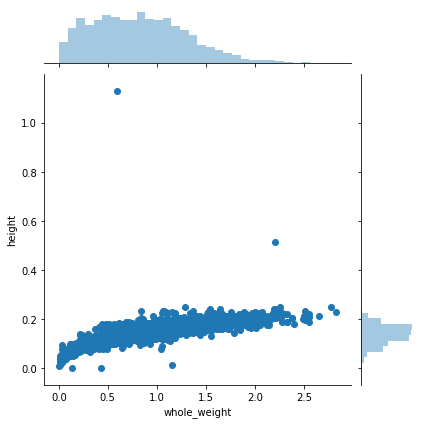

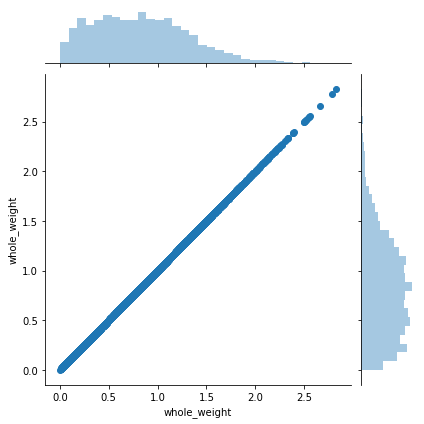

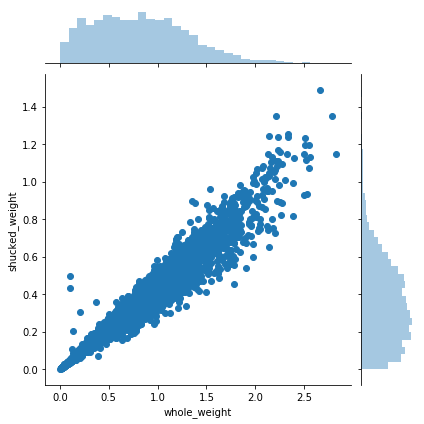

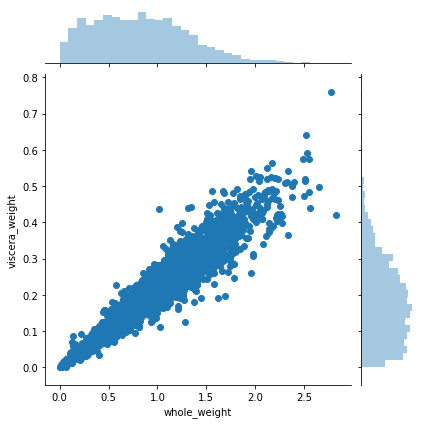

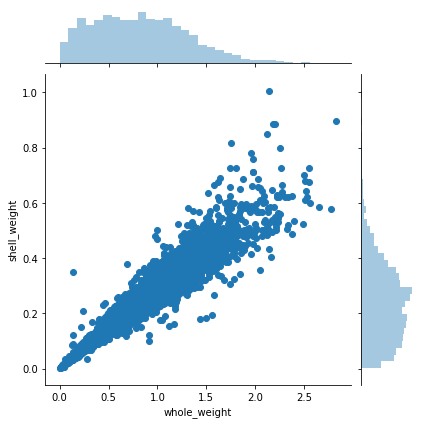

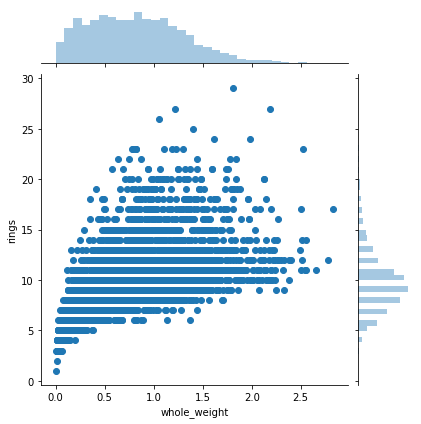

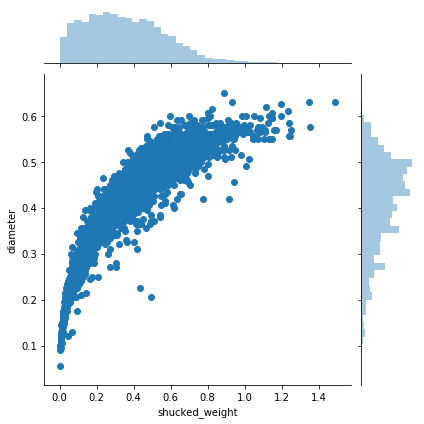

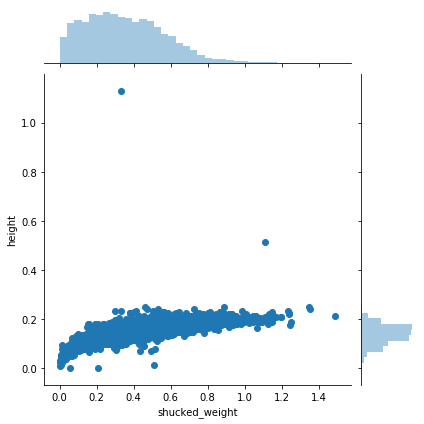

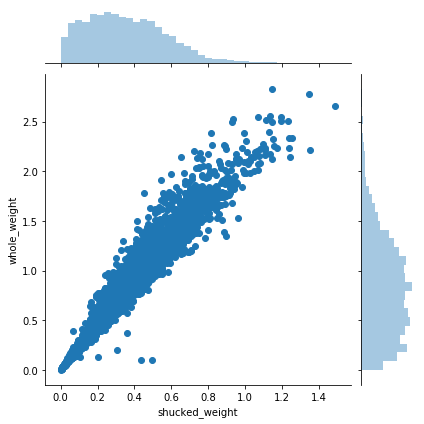

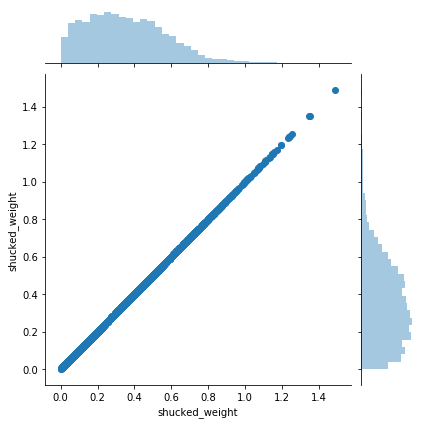

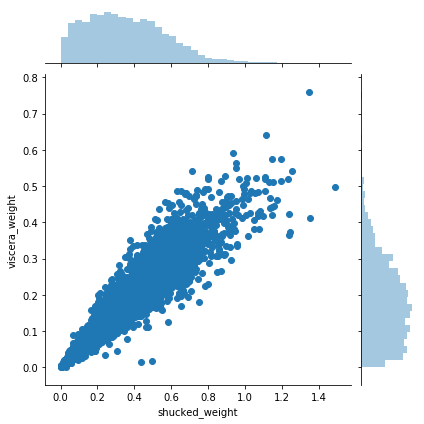

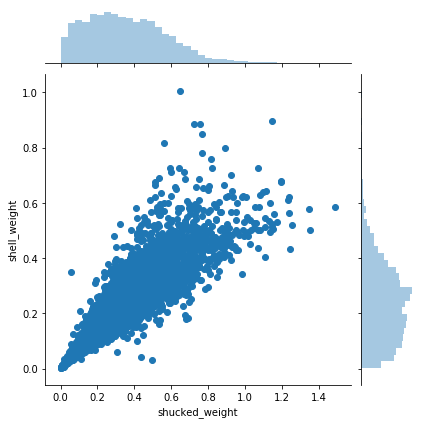

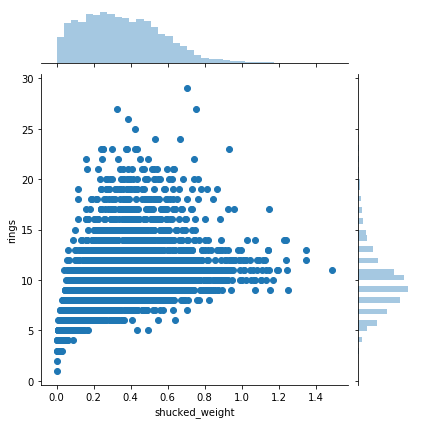

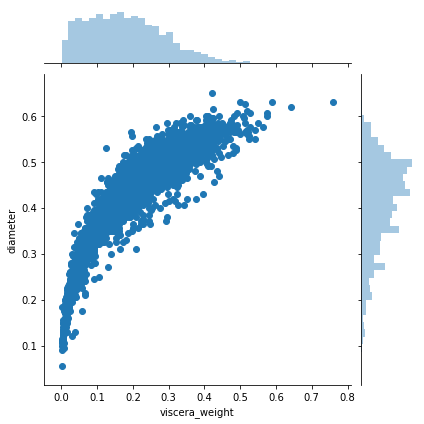

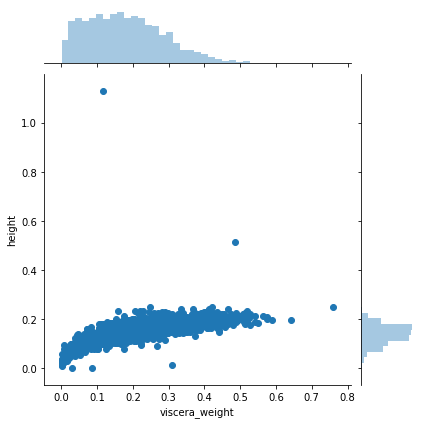

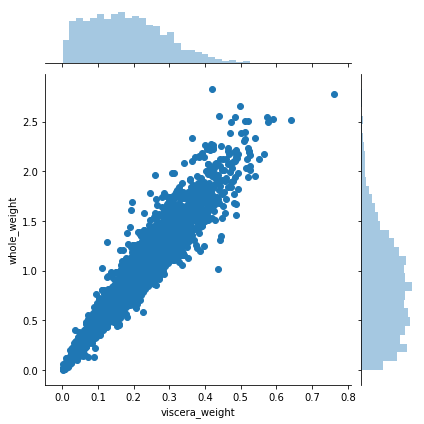

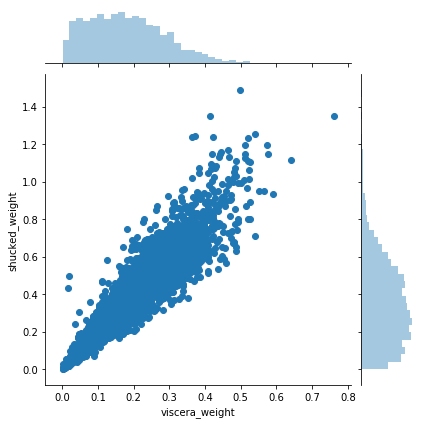

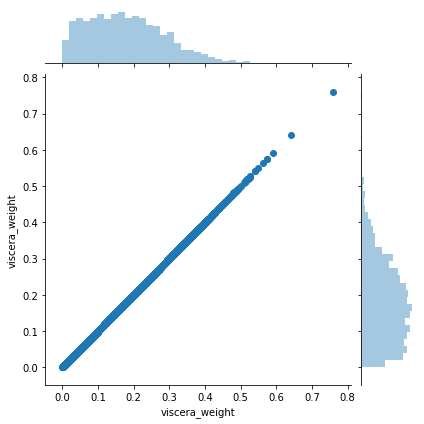

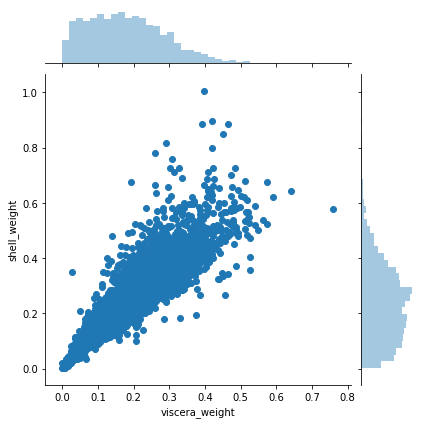

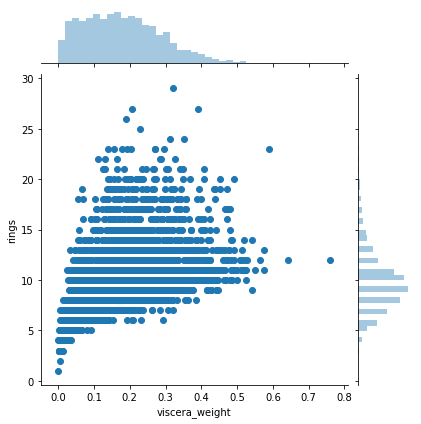

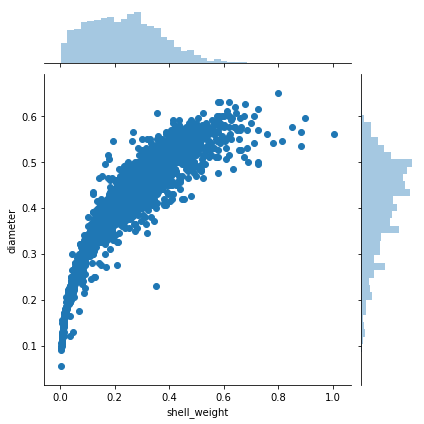

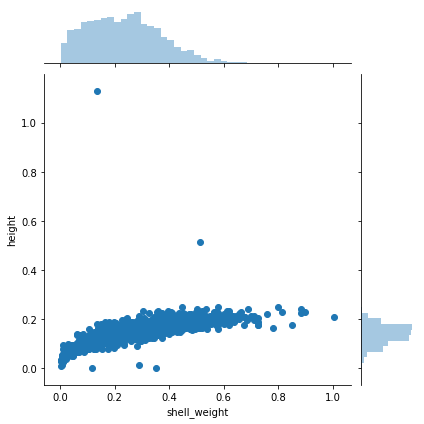

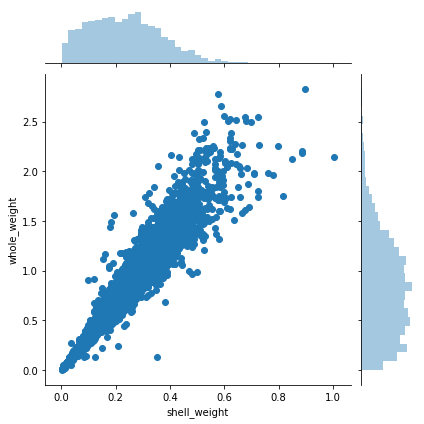

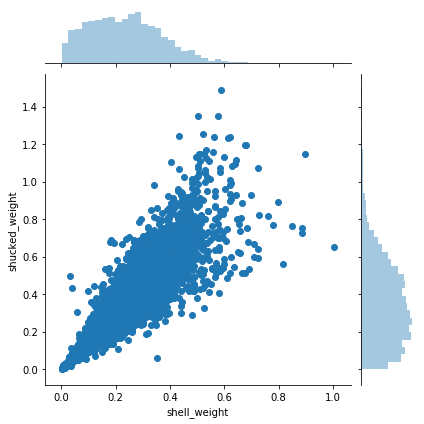

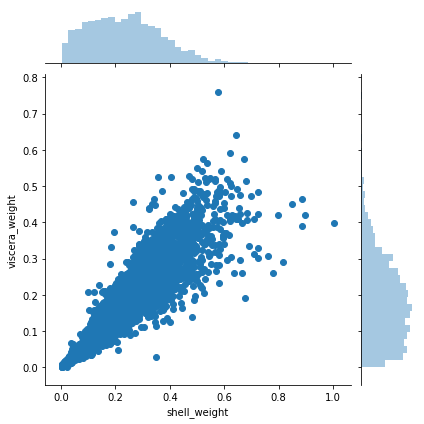

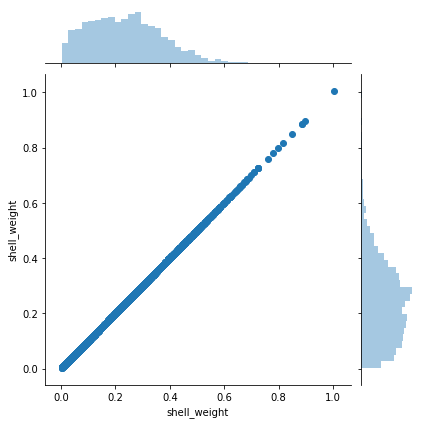

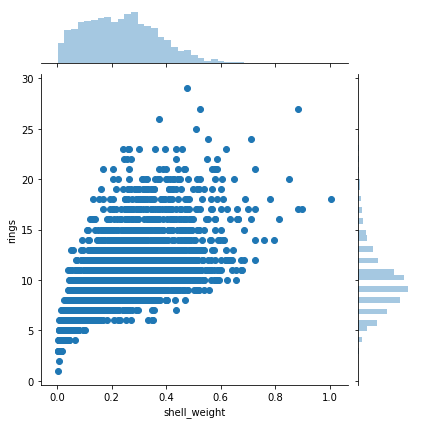

In [7]:
def generatePlot4GivenAttributesPair(data):
    for i in range(1, len(data.keys())-1):
        for j in range(2, len(data.keys())):
            g = sns.jointplot(data.keys()[i], data.keys()[j], data=data)

generatePlot4GivenAttributesPair(abaloneData)

In [17]:
corr = abaloneData.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1,0.99,0.83,0.93,0.9,0.9,0.9,0.56
diameter,0.99,1,0.83,0.93,0.89,0.9,0.91,0.57
height,0.83,0.83,1,0.82,0.77,0.8,0.82,0.56
whole_weight,0.93,0.93,0.82,1,0.97,0.97,0.96,0.54
shucked_weight,0.9,0.89,0.77,0.97,1,0.93,0.88,0.42
viscera_weight,0.9,0.9,0.8,0.97,0.93,1,0.91,0.5
shell_weight,0.9,0.91,0.82,0.96,0.88,0.91,1,0.63
rings,0.56,0.57,0.56,0.54,0.42,0.5,0.63,1


In [35]:
cov = abaloneData.cov()
cov.style.background_gradient(cmap='coolwarm').set_precision(2)

<class 'pandas.core.frame.DataFrame'>


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,0.014,0.012,0.0042,0.054,0.024,0.012,0.015,0.22
diameter,0.012,0.0098,0.0035,0.045,0.02,0.0098,0.013,0.18
height,0.0042,0.0035,0.0017,0.017,0.0072,0.0037,0.0048,0.075
whole_weight,0.054,0.045,0.017,0.24,0.11,0.052,0.065,0.85
shucked_weight,0.024,0.02,0.0072,0.11,0.049,0.023,0.027,0.3
viscera_weight,0.012,0.0098,0.0037,0.052,0.023,0.012,0.014,0.18
shell_weight,0.015,0.013,0.0048,0.065,0.027,0.014,0.019,0.28
rings,0.22,0.18,0.075,0.85,0.3,0.18,0.28,10
